In [1]:
import optuna
import Optimization as OP
import FrameworkLib as FL
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx   
from scipy.optimize import minimize

In [2]:
# max edge_relation
# s.t. EGVL_RIG > threshold & nodes in box
N_agents = 4
max_dist = 3
threshold = 1e-2
box_margin = 10

found = False
while found == False:
    # generate a random graph
    p0 = {i: (random.uniform(0, box_margin), random.uniform(0, box_margin)) for i in range(N_agents)}
    p0_reshaped = np.array([coord for coords in p0.values() for coord in coords])
    # Generate a random graph with num_agents nodes
    G0 = FL.generate_graph(p0, max_dist)
    rig, eig = FL.is_rigid(G0)
    if rig and eig > threshold:
        found = True

# init class
op = OP.Objective(N_agents,max_dist,threshold,box_margin)
op.G = FL.generate_graph(p0, max_dist)
op.p0 = p0_reshaped
op.p = p0_reshaped
initial_guess = p0_reshaped[0:2]

# Define the constraints dictionary
constraints = {'type': 'eq', 'fun': op.constraint_function}

# Perform the optimization
result = minimize(op.objective_function, initial_guess, constraints=constraints)
# result = minimize(op.objective_function, initial_guess)

# Print the optimization result
print("Optimization Result:")
print(result)
print("\nInitial Condition:")
print("p0:", p0_reshaped)

Optimization Result:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1715728752538097
       x: [ 7.083e+00  5.704e+00]
     nit: 6
     jac: [ 0.000e+00  0.000e+00]
    nfev: 19
    njev: 6

Initial Condition:
p0: [7.93933504 6.06175734 7.19369517 4.98758273 5.3304984  6.71910525
 7.78919346 3.57324729]


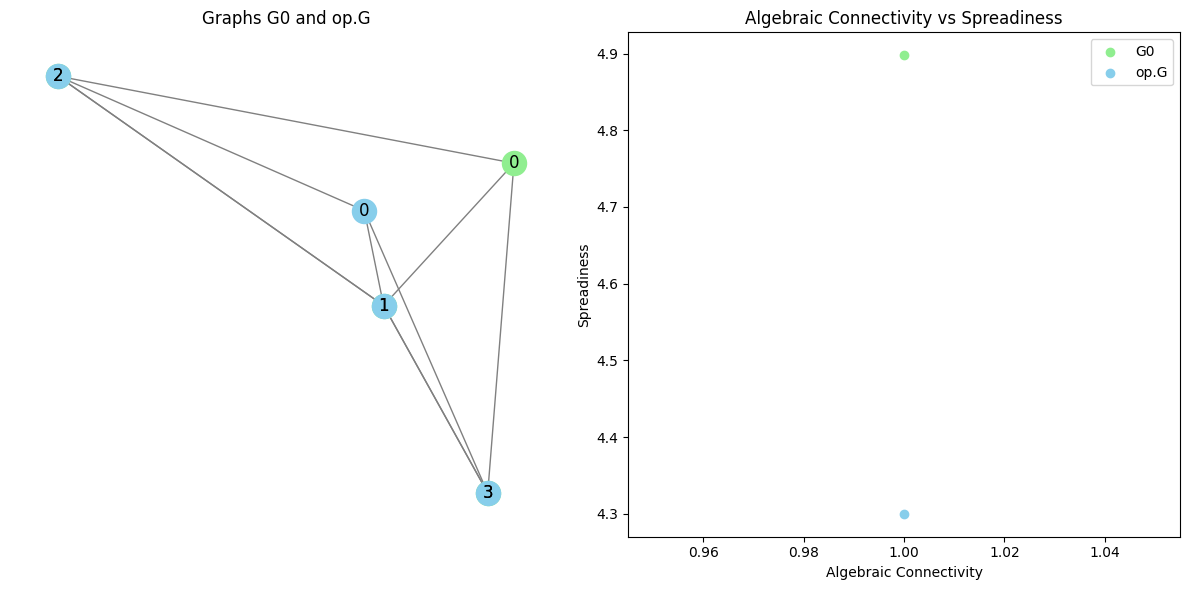

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the two graphs in the first subplot
nx.draw(G0, pos=nx.get_node_attributes(G0, 'pos'), with_labels=True, node_color='lightgreen', edge_color='gray', ax=ax1)
nx.draw(op.G, pos=nx.get_node_attributes(op.G, 'pos'), with_labels=True, node_color='skyblue', edge_color='gray', ax=ax1)
ax1.set_title('Graphs G0 and op.G')

# Plot algebraic connectivity vs spreadiness in the second subplot
ax2.scatter(FL.get_algebraic_connectivity(G0), FL.get_spreadiness(G0,op.map_radius), color='lightgreen', label='G0')
ax2.scatter(FL.get_algebraic_connectivity(op.G), FL.get_spreadiness(op.G, op.map_radius), color='skyblue', label='op.G')
ax2.set_xlabel('Algebraic Connectivity')
ax2.set_ylabel('Spreadiness')
ax2.legend()
ax2.set_title('Algebraic Connectivity vs Spreadiness')

plt.tight_layout()
plt.show()
